In [43]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 



In [44]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score, accuracy_score, confusion_matrix 
from sklearn.cluster import KMeans 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA

In [45]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-3-insurance.csv')
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [46]:
mis_val = data.isna().sum() * 100/len(data)

mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [47]:
data.duplicated().sum()

data.drop_duplicates(subset=None, inplace=True, ignore_index=False, keep='last')

data.duplicated().sum()

0

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [49]:
orig_sex = data.sex 
orig_sex_dic = np.unique(data.sex)

le = LabelEncoder()

data.sex = le.fit_transform(data.sex)
data.smoker = le.fit_transform(data.smoker)
data.region = le.fit_transform(data.region)

le_sex = data.sex 

le_sex_dic = np.unique(le_sex)

sex_dic = dict(zip(orig_sex_dic,le_sex_dic))
sex_dic

{'female': 0, 'male': 1}

<AxesSubplot:title={'center':'Correlation Matrix'}>

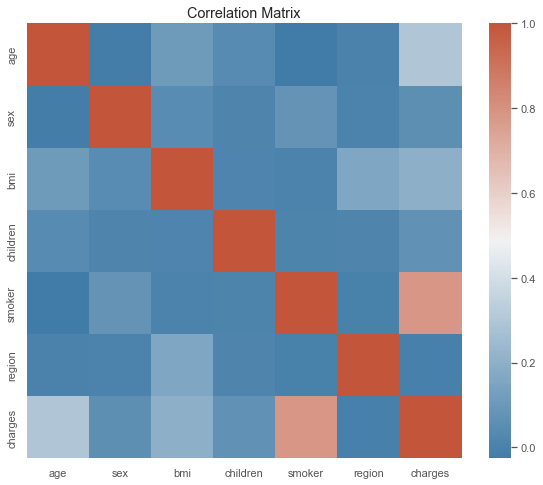

In [50]:
data_corr = data.corr()

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,20, as_cmap=True), square=True, ax=ax)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.3)

In [ ]:
linreg = LinearRegression()